# 1. Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from joblib import load
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
import patsy

In [2]:
df01 = pd.read_csv('/kaggle/input/cars-datasets/V2_Cleaned_Volkswagen_DataFrame.csv', delimiter=';') # Specify the delimiter used in the CSV file
df02 = pd.read_csv('/kaggle/input/cars-datasets/V2_Cleaned_Toyota_DataFrame.csv', delimiter=';') # Specify the delimiter used in the CSV file
df03 = pd.read_csv('/kaggle/input/cars-datasets/V2_Cleaned_Skoda_DataFrame.csv', delimiter=';') # Specify the delimiter used in the CSV file
df04 = pd.read_csv('/kaggle/input/cars-datasets/V2_Cleaned_Renault_DataFrame.csv', delimiter=';') # Specify the delimiter used in the CSV file
df05 = pd.read_csv('/kaggle/input/cars-datasets/V2_Cleaned_Opel_DataFrame.csv', delimiter=';') # Specify the delimiter used in the CSV file
df06 = pd.read_csv('/kaggle/input/cars-datasets/V2_Cleaned_Ford_DataFrame.csv', delimiter=';') # Specify the delimiter used in the CSV file
df07 = pd.read_csv('/kaggle/input/cars-datasets/V2_Cleaned_Fiat_DataFrame.csv', delimiter=';') # Specify the delimiter used in the CSV file

In [3]:
sum_df = pd.concat([df01, df02, df03, df04, df05, df06, df07], ignore_index=True)
df0=sum_df.drop(columns=['Unnamed: 0','Ürün Kodu',])

In [4]:
df0["Yaş"]=2023-df0["Araç Yılı"]

In [5]:
df0['Kilometre'] = df0['Kilometre'].astype(str).str.replace(' km', '').str.replace('.', '').astype(float)
df0['Motor Hacmi'] = df0['Motor Hacmi'].astype(str).str.replace(' cc', '').astype(int)
df0['Motor Gücü'] = df0['Motor Gücü'].astype(str).str.replace(' hp', '').astype(int)
df0['Ortalama Yakıt Tüketimi'] = df0['Ortalama Yakıt Tüketimi'].astype(str).str.replace(' lt', '').str.replace(',', '.').astype(float)
df0['Fiyat'] = df0['Fiyat'].astype(str).str.replace(' TL', '').str.replace('.', '').astype(int)
df0['Depo Hacmi'] = df0['Depo Hacmi'].astype(str).str.replace(' lt', '').str.replace(',', '.').astype(float)

In [6]:
df0.head()

,Marka,Seri,Model,Araç Yılı,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş Tipi,Ortalama Yakıt Tüketimi,Depo Hacmi,Boya/Değişen Bilgisi,Fiyat,Yaş
0,Volkswagen,Golf,1.6 TDi BlueMotion Comfortline,2018,161000.0,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598,115,Önden Çekiş,4.2,50.0,1 boyalı,970000,5
1,Volkswagen,Polo,1.0 TSi Highline,2018,82000.0,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,999,95,Önden Çekiş,4.6,40.0,4 boyalı,860000,5
2,Volkswagen,Passat,1.6 TDi Business,2020,76000.0,Yarı Otomatik,Dizel,Sedan,Beyaz,1598,120,Önden Çekiş,4.0,59.0,Tamamı orjinal,1530000,3
3,Volkswagen,VW CC,1.4 TSi,2013,130000.0,Yarı Otomatik,Benzin,Coupe,Beyaz,1390,160,Önden Çekiş,6.1,70.0,Tamamı orjinal,915000,10
4,Volkswagen,Polo,1.4 TDi Comfortline,2016,73000.0,Düz,Dizel,Hatchback/5,Beyaz,1422,90,Önden Çekiş,3.4,45.0,Tamamı orjinal,770000,7


In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14603 entries, 0 to 14602
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Marka                    14603 non-null  object 
 1   Seri                     14603 non-null  object 
 2   Model                    14603 non-null  object 
 3   Araç Yılı                14603 non-null  int64  
 4   Kilometre                14603 non-null  float64
 5   Vites Tipi               14603 non-null  object 
 6   Yakıt Tipi               14603 non-null  object 
 7   Kasa Tipi                14603 non-null  object 
 8   Renk                     14603 non-null  object 
 9   Motor Hacmi              14603 non-null  int64  
 10  Motor Gücü               14603 non-null  int64  
 11  Çekiş Tipi               14603 non-null  object 
 12  Ortalama Yakıt Tüketimi  14603 non-null  float64
 13  Depo Hacmi               14603 non-null  float64
 14  Boya/Değişen Bilgisi  

In [8]:
#Selecting integer columns
smaller_df1 = df0.loc[:,['Yaş','Kilometre','Motor Hacmi','Motor Gücü','Ortalama Yakıt Tüketimi','Depo Hacmi','Fiyat']]
smaller_df1  # Notes = Dataset has outliers.

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat
0,5,161000.0,1598,115,4.2,50.0,970000
1,5,82000.0,999,95,4.6,40.0,860000
2,3,76000.0,1598,120,4.0,59.0,1530000
3,10,130000.0,1390,160,6.1,70.0,915000
4,7,73000.0,1422,90,3.4,45.0,770000
...,...,...,...,...,...,...,...
14598,13,159000.0,1248,70,4.6,51.0,403000
14599,4,68000.0,1368,95,5.7,45.0,600000
14600,7,161000.0,1248,95,4.9,45.0,515000
14601,10,194800.0,1368,77,5.7,45.0,510000


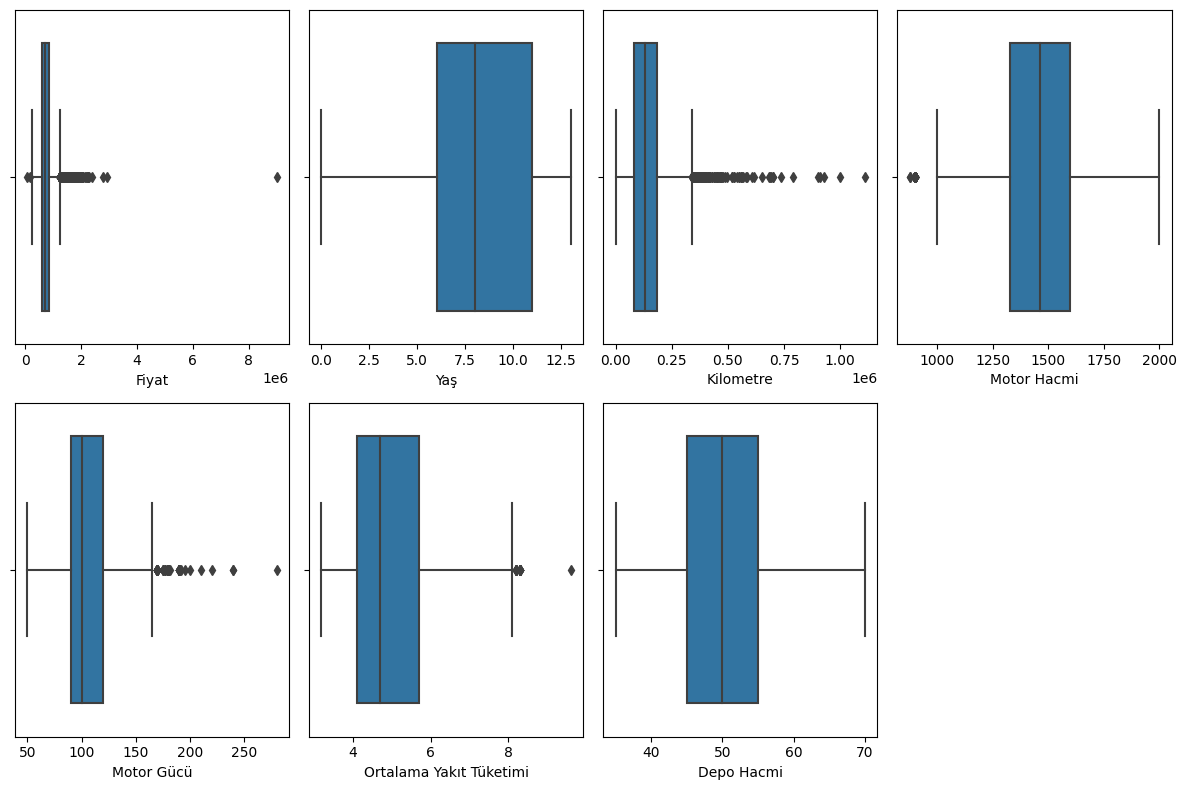

In [9]:
#Showing outliers with boxplot

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
sns.boxplot(x=smaller_df1['Fiyat'])
plt.subplot(2, 4, 2)
sns.boxplot(x=smaller_df1['Yaş'])
plt.subplot(2, 4, 3)
sns.boxplot(x=smaller_df1['Kilometre'])
plt.subplot(2, 4, 4)
sns.boxplot(x=smaller_df1['Motor Hacmi'])
plt.subplot(2, 4, 5)
sns.boxplot(x=smaller_df1['Motor Gücü'])
plt.subplot(2, 4, 6)
sns.boxplot(x=smaller_df1['Ortalama Yakıt Tüketimi'])
plt.subplot(2, 4, 7)
sns.boxplot(x=smaller_df1['Depo Hacmi'])

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Yaş'}>,
        <Axes: title={'center': 'Kilometre'}>,
        <Axes: title={'center': 'Motor Hacmi'}>],
       [<Axes: title={'center': 'Motor Gücü'}>,
        <Axes: title={'center': 'Ortalama Yakıt Tüketimi'}>,
        <Axes: title={'center': 'Depo Hacmi'}>],
       [<Axes: title={'center': 'Fiyat'}>, <Axes: >, <Axes: >]],
      dtype=object)

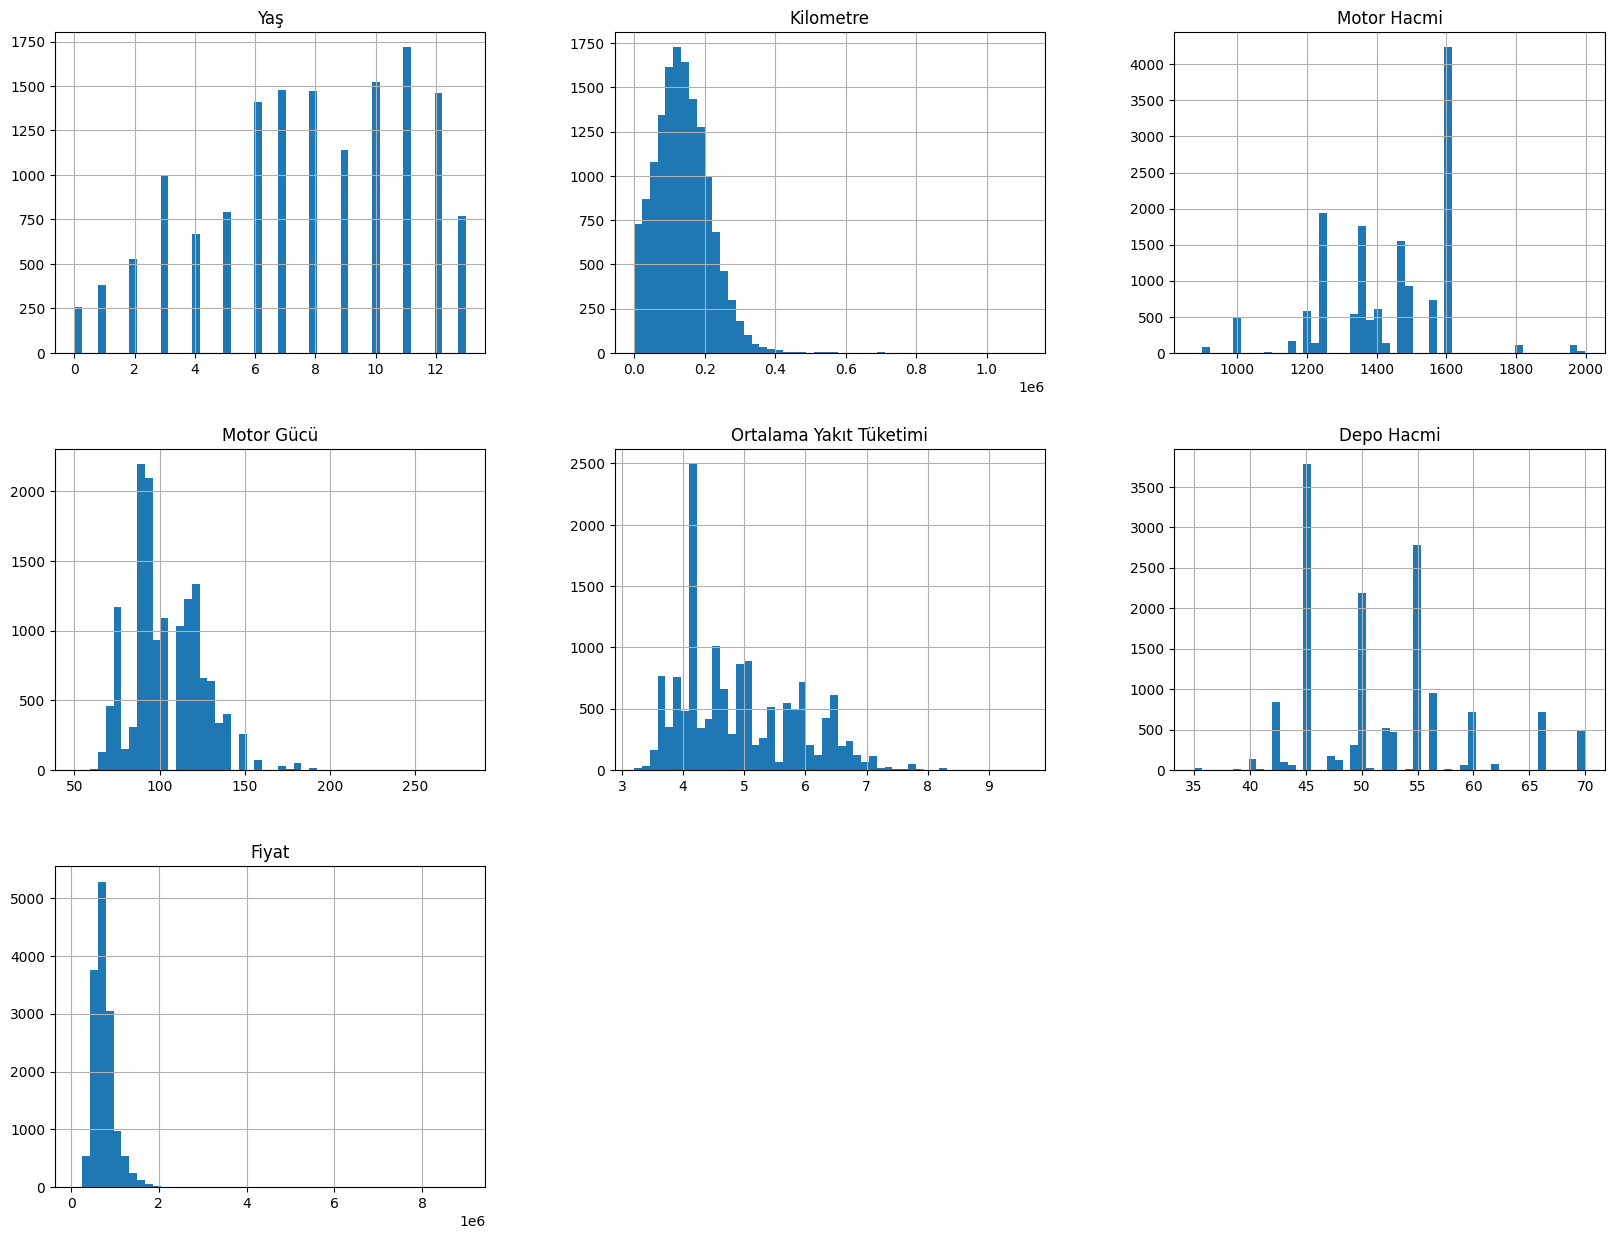

In [10]:
# drawing hist. to dataset pre-examination
smaller_df1.hist(bins=50, figsize=(20,15))   

In [11]:
def find_outliers_IQR(data):
    Q1 = data.quantile(0.25) #1st quarter
    Q3 = data.quantile(0.75) #3rd quarter
    IQR = Q3 - Q1 # interquarter range
    upper_bound = (Q3 + 1.5 * IQR)
    lower_bound = (Q1 - 1.5 * IQR)
    outliers = data[(data < lower_bound) | (data > upper_bound)] #finding outliers
    return lower_bound, upper_bound, outliers #return outliers


LB, UB, outliers = find_outliers_IQR(smaller_df1)

print("UPPER BOUND OF PRICE:","\n", UB)    #upper bound
print("LOWER BOUND OF PRICE:","\n", LB)    #lower bound

UPPER BOUND OF PRICE: 
 Yaş                             18.5
Kilometre                   340909.5
Motor Hacmi                   2001.5
Motor Gücü                     165.0
Ortalama Yakıt Tüketimi          8.1
Depo Hacmi                      70.0
Fiyat                      1239750.0
dtype: float64
LOWER BOUND OF PRICE: 
 Yaş                            -1.5
Kilometre                  -72182.5
Motor Hacmi                   925.5
Motor Gücü                     45.0
Ortalama Yakıt Tüketimi         1.7
Depo Hacmi                     30.0
Fiyat                      200150.0
dtype: float64


In [12]:
# Outlier extraction
df = df0[(200000 < df0['Fiyat']) & (df0['Fiyat'] < 1500000) & (df0['Kilometre'] < 350000) & (900 < df0['Motor Hacmi']) & (df0['Motor Hacmi'] < 1700) & (df0['Motor Gücü'] < 170) & (df0['Ortalama Yakıt Tüketimi'] < 8.1) & (df0['Depo Hacmi'] < 70)]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13527 entries, 0 to 14602
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Marka                    13527 non-null  object 
 1   Seri                     13527 non-null  object 
 2   Model                    13527 non-null  object 
 3   Araç Yılı                13527 non-null  int64  
 4   Kilometre                13527 non-null  float64
 5   Vites Tipi               13527 non-null  object 
 6   Yakıt Tipi               13527 non-null  object 
 7   Kasa Tipi                13527 non-null  object 
 8   Renk                     13527 non-null  object 
 9   Motor Hacmi              13527 non-null  int64  
 10  Motor Gücü               13527 non-null  int64  
 11  Çekiş Tipi               13527 non-null  object 
 12  Ortalama Yakıt Tüketimi  13527 non-null  float64
 13  Depo Hacmi               13527 non-null  float64
 14  Boya/Değişen Bilgisi     13

In [14]:
df.columns

Index(['Marka', 'Seri', 'Model', 'Araç Yılı', 'Kilometre', 'Vites Tipi',
       'Yakıt Tipi', 'Kasa Tipi', 'Renk', 'Motor Hacmi', 'Motor Gücü',
       'Çekiş Tipi', 'Ortalama Yakıt Tüketimi', 'Depo Hacmi',
       'Boya/Değişen Bilgisi', 'Fiyat', 'Yaş'],
      dtype='object')

## 2. Train Model in Raw Columns

In [15]:
lsm = smf.ols('Fiyat ~ Yaş + Kilometre + Q("Motor Hacmi") + Q("Motor Gücü") + Q("Ortalama Yakıt Tüketimi") + Q("Depo Hacmi")' , data=smaller_df1)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Fiyat   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     4035.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:34:36   Log-Likelihood:            -1.9500e+05
No. Observations:               14603   AIC:                         3.900e+05
Df Residuals:                   14596   BIC:                         3.901e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     2.097e+05   1.31e+04     16.002      0.000    1.84e+05    2.35e+05
Yaş                          -2.394e+04    520.379    -46.002      0.000    -2.5e+04   -2.29e+04
Kilometre                       -0.9445      0.021    -44.034      0.000      -0.987      -0.902
Q("Motor Hacmi")               112.2258      8.990     12.483      0.000      94.604     129.848
Q("Motor Gücü")               3276.5199     93.365     35.094      0.000    3093.513    3459.526
Q("Ortalama Yakıt Tüketimi") -5.967e+04   1534.440    -38.885      0.000   -6.27e+04   -5.67e+04
Q("Depo Hacmi")               1.255e+04    236.882     52.963      0.000    1.21e+04     1.3e+04
==============================================================================
Omnibus:                    25284.442   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        192364516.101
Skew:                          11.288   Prob(JB):                         0.00
Kurtosis:                     564.819   Cond. No.                     1.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
smaller_df1.to_csv("Raw_Data.csv")

In [17]:
smaller_df2 = df.loc[:,['Yaş','Kilometre','Motor Hacmi','Motor Gücü','Ortalama Yakıt Tüketimi','Depo Hacmi','Fiyat']] 
smaller_df2 #outliers have been reduced

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat
0,5,161000.0,1598,115,4.2,50.0,970000
1,5,82000.0,999,95,4.6,40.0,860000
4,7,73000.0,1422,90,3.4,45.0,770000
6,9,115000.0,1390,122,6.2,55.0,980000
7,9,93500.0,1390,85,5.9,45.0,665000
...,...,...,...,...,...,...,...
14598,13,159000.0,1248,70,4.6,51.0,403000
14599,4,68000.0,1368,95,5.7,45.0,600000
14600,7,161000.0,1248,95,4.9,45.0,515000
14601,10,194800.0,1368,77,5.7,45.0,510000


In [18]:
smaller_df2.to_csv("Outlier_Reduced_Data.csv")

array([[<Axes: title={'center': 'Yaş'}>,
        <Axes: title={'center': 'Kilometre'}>,
        <Axes: title={'center': 'Motor Hacmi'}>],
       [<Axes: title={'center': 'Motor Gücü'}>,
        <Axes: title={'center': 'Ortalama Yakıt Tüketimi'}>,
        <Axes: title={'center': 'Depo Hacmi'}>],
       [<Axes: title={'center': 'Fiyat'}>, <Axes: >, <Axes: >]],
      dtype=object)

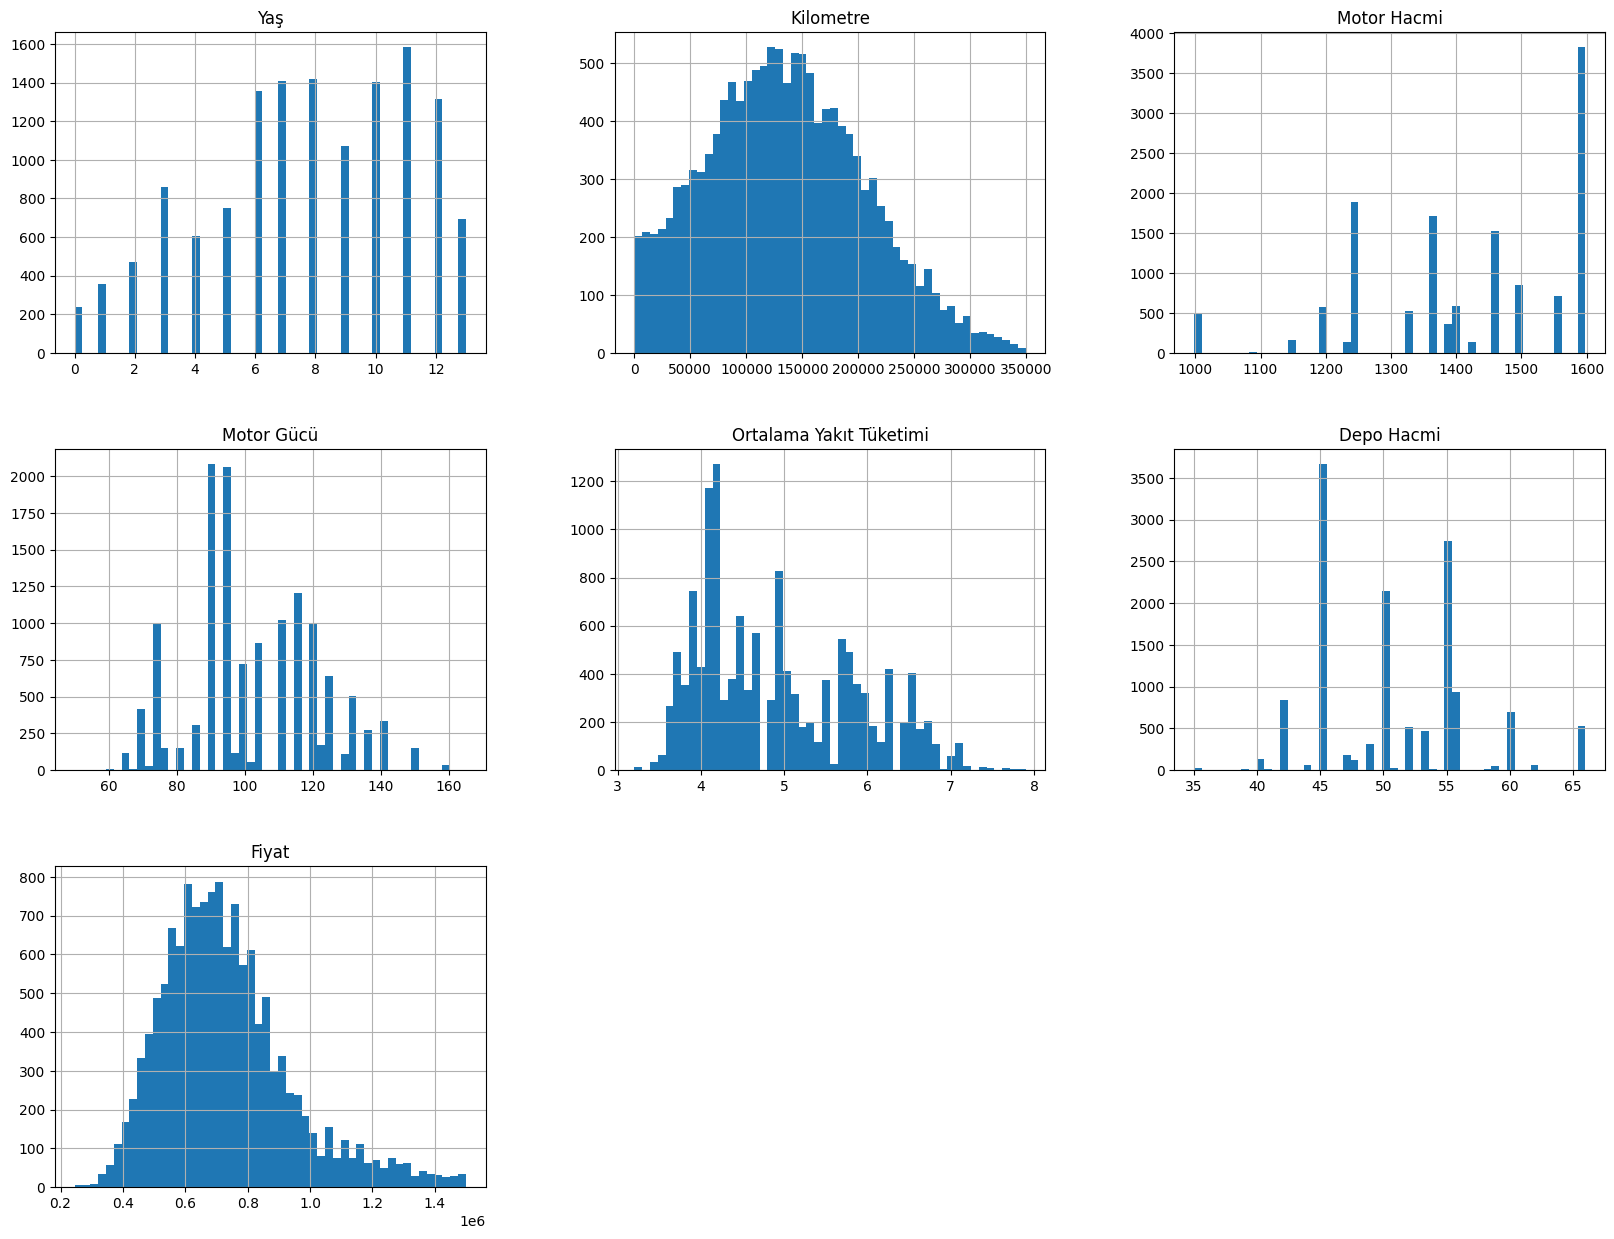

In [19]:
#Drawing hist. for dataset pre-examination
smaller_df2.hist(bins=50, figsize=(20,15)) 

In [20]:
lsm = smf.ols('Fiyat ~ Yaş + Kilometre + Q("Motor Hacmi") + Q("Motor Gücü") + Q("Ortalama Yakıt Tüketimi") + Q("Depo Hacmi") ', data=smaller_df2)
fit1 = lsm.fit()
fit1.summary() 
# only outliers droped and here is r-squared
#0.624 ---> 0.689

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Fiyat   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     4982.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:34:49   Log-Likelihood:            -1.7691e+05
No. Observations:               13527   AIC:                         3.538e+05
Df Residuals:                   13520   BIC:                         3.539e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     2.179e+05   1.13e+04     19.212      0.000    1.96e+05     2.4e+05
Yaş                           -1.87e+04    426.802    -43.816      0.000   -1.95e+04   -1.79e+04
Kilometre                       -0.9813      0.020    -49.740      0.000      -1.020      -0.943
Q("Motor Hacmi")                78.6038      7.665     10.255      0.000      63.579      93.629
Q("Motor Gücü")               3660.7593     77.111     47.474      0.000    3509.611    3811.907
Q("Ortalama Yakıt Tüketimi") -5.464e+04   1227.768    -44.502      0.000    -5.7e+04   -5.22e+04
Q("Depo Hacmi")               1.124e+04    210.012     53.512      0.000    1.08e+04    1.16e+04
==============================================================================
Omnibus:                      960.170   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1680.063
Skew:                           0.532   Prob(JB):                         0.00
Kurtosis:                       4.360   Cond. No.                     1.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
smaller_df2.columns

Index(['Yaş', 'Kilometre', 'Motor Hacmi', 'Motor Gücü',
       'Ortalama Yakıt Tüketimi', 'Depo Hacmi', 'Fiyat'],
      dtype='object')

In [22]:
smaller_df2.corr()

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat
Yaş,1.000000,0.622878,0.092750,-0.280624,0.085805,0.147774,-0.571744
Kilometre,0.622878,1.000000,0.162012,-0.203544,-0.227883,0.186844,-0.463231
Motor Hacmi,0.092750,0.162012,1.000000,0.470696,0.019372,0.450801,0.277335
Motor Gücü,-0.280624,-0.203544,0.470696,1.000000,0.286507,0.496992,0.606063
Ortalama Yakıt Tüketimi,0.085805,-0.227883,0.019372,0.286507,1.000000,0.104758,-0.065648
Depo Hacmi,0.147774,0.186844,0.450801,0.496992,0.104758,1.000000,0.386032
Fiyat,-0.571744,-0.463231,0.277335,0.606063,-0.065648,0.386032,1.000000


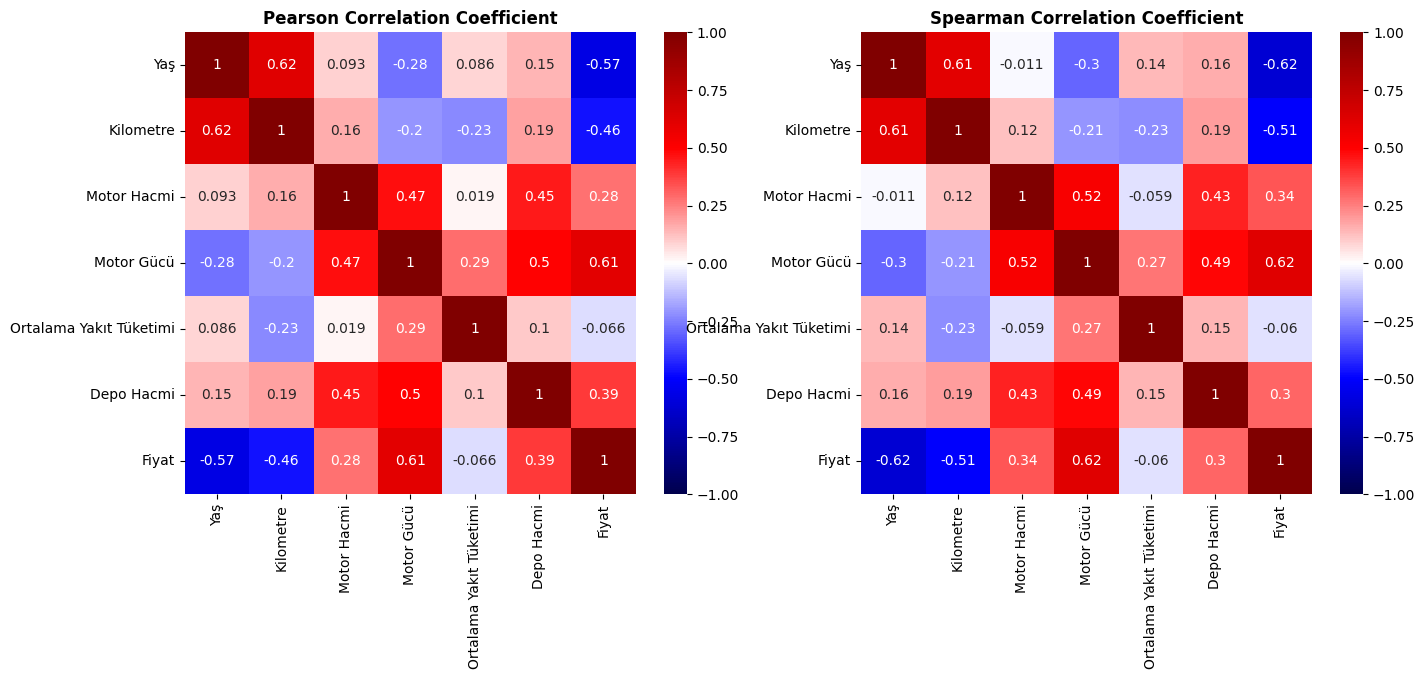

In [23]:
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
plt.title('Pearson Correlation Coefficient', weight='bold')
sns.heatmap(smaller_df2.corr(method='pearson'), cmap="seismic", annot=True, vmin=-1, vmax=1);

plt.subplot(1,2,2)
plt.title('Spearman Correlation Coefficient', weight='bold')
sns.heatmap(smaller_df2.corr(method='spearman'), cmap="seismic", annot=True, vmin=-1, vmax=1);

## 3. Outliers

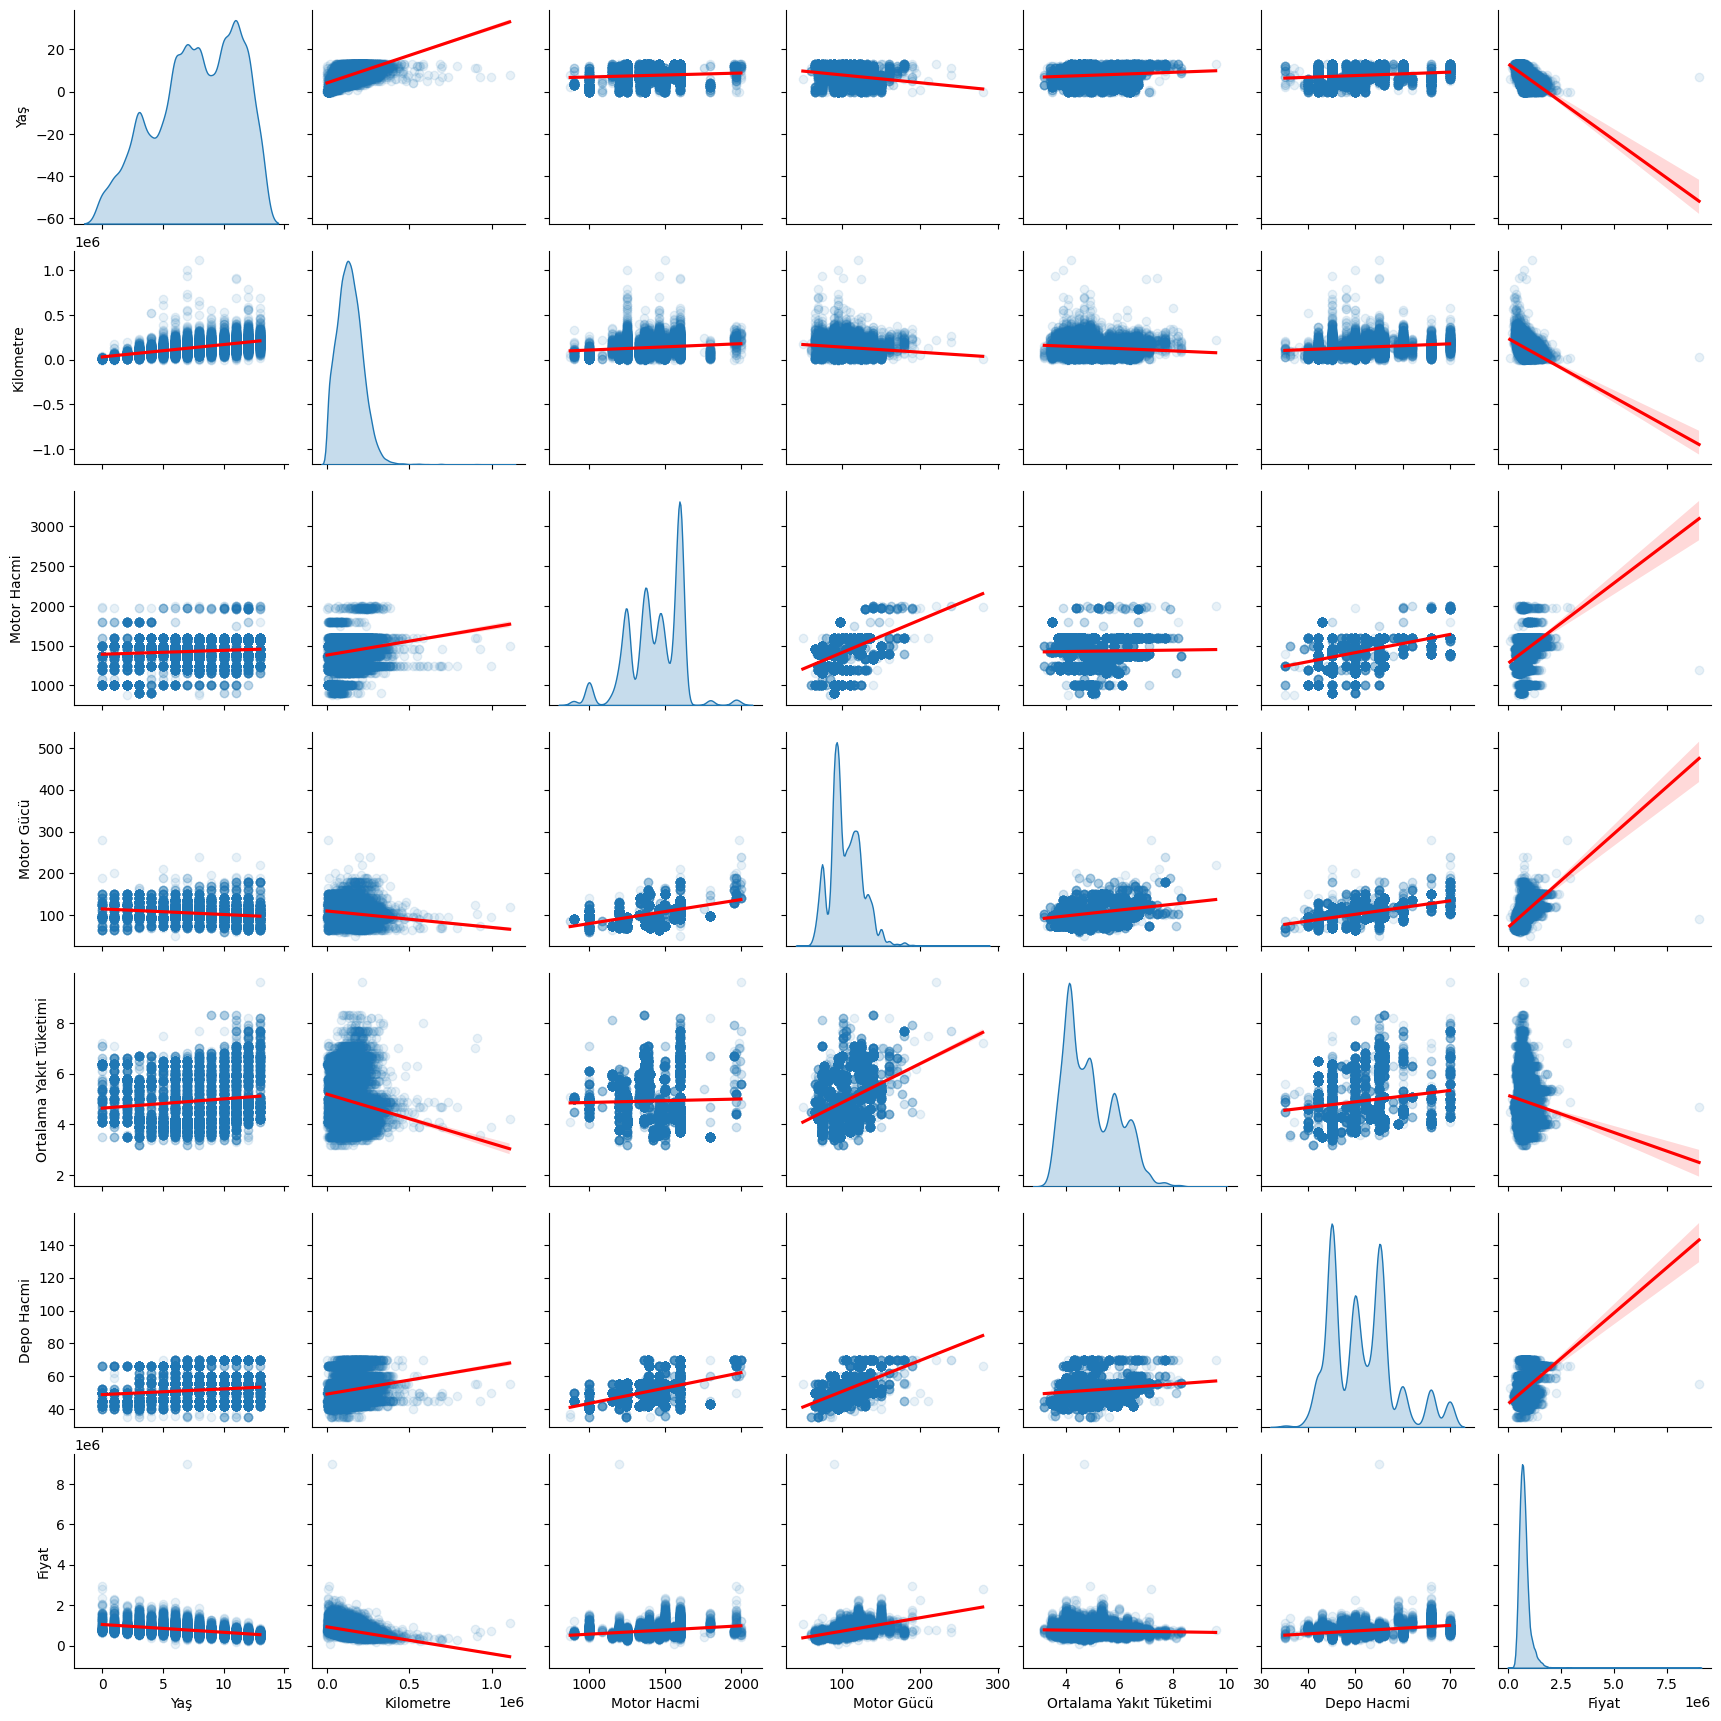

In [24]:
# Drawing Pairploti in raw dataset(has outtliers)
sns.pairplot(smaller_df1, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

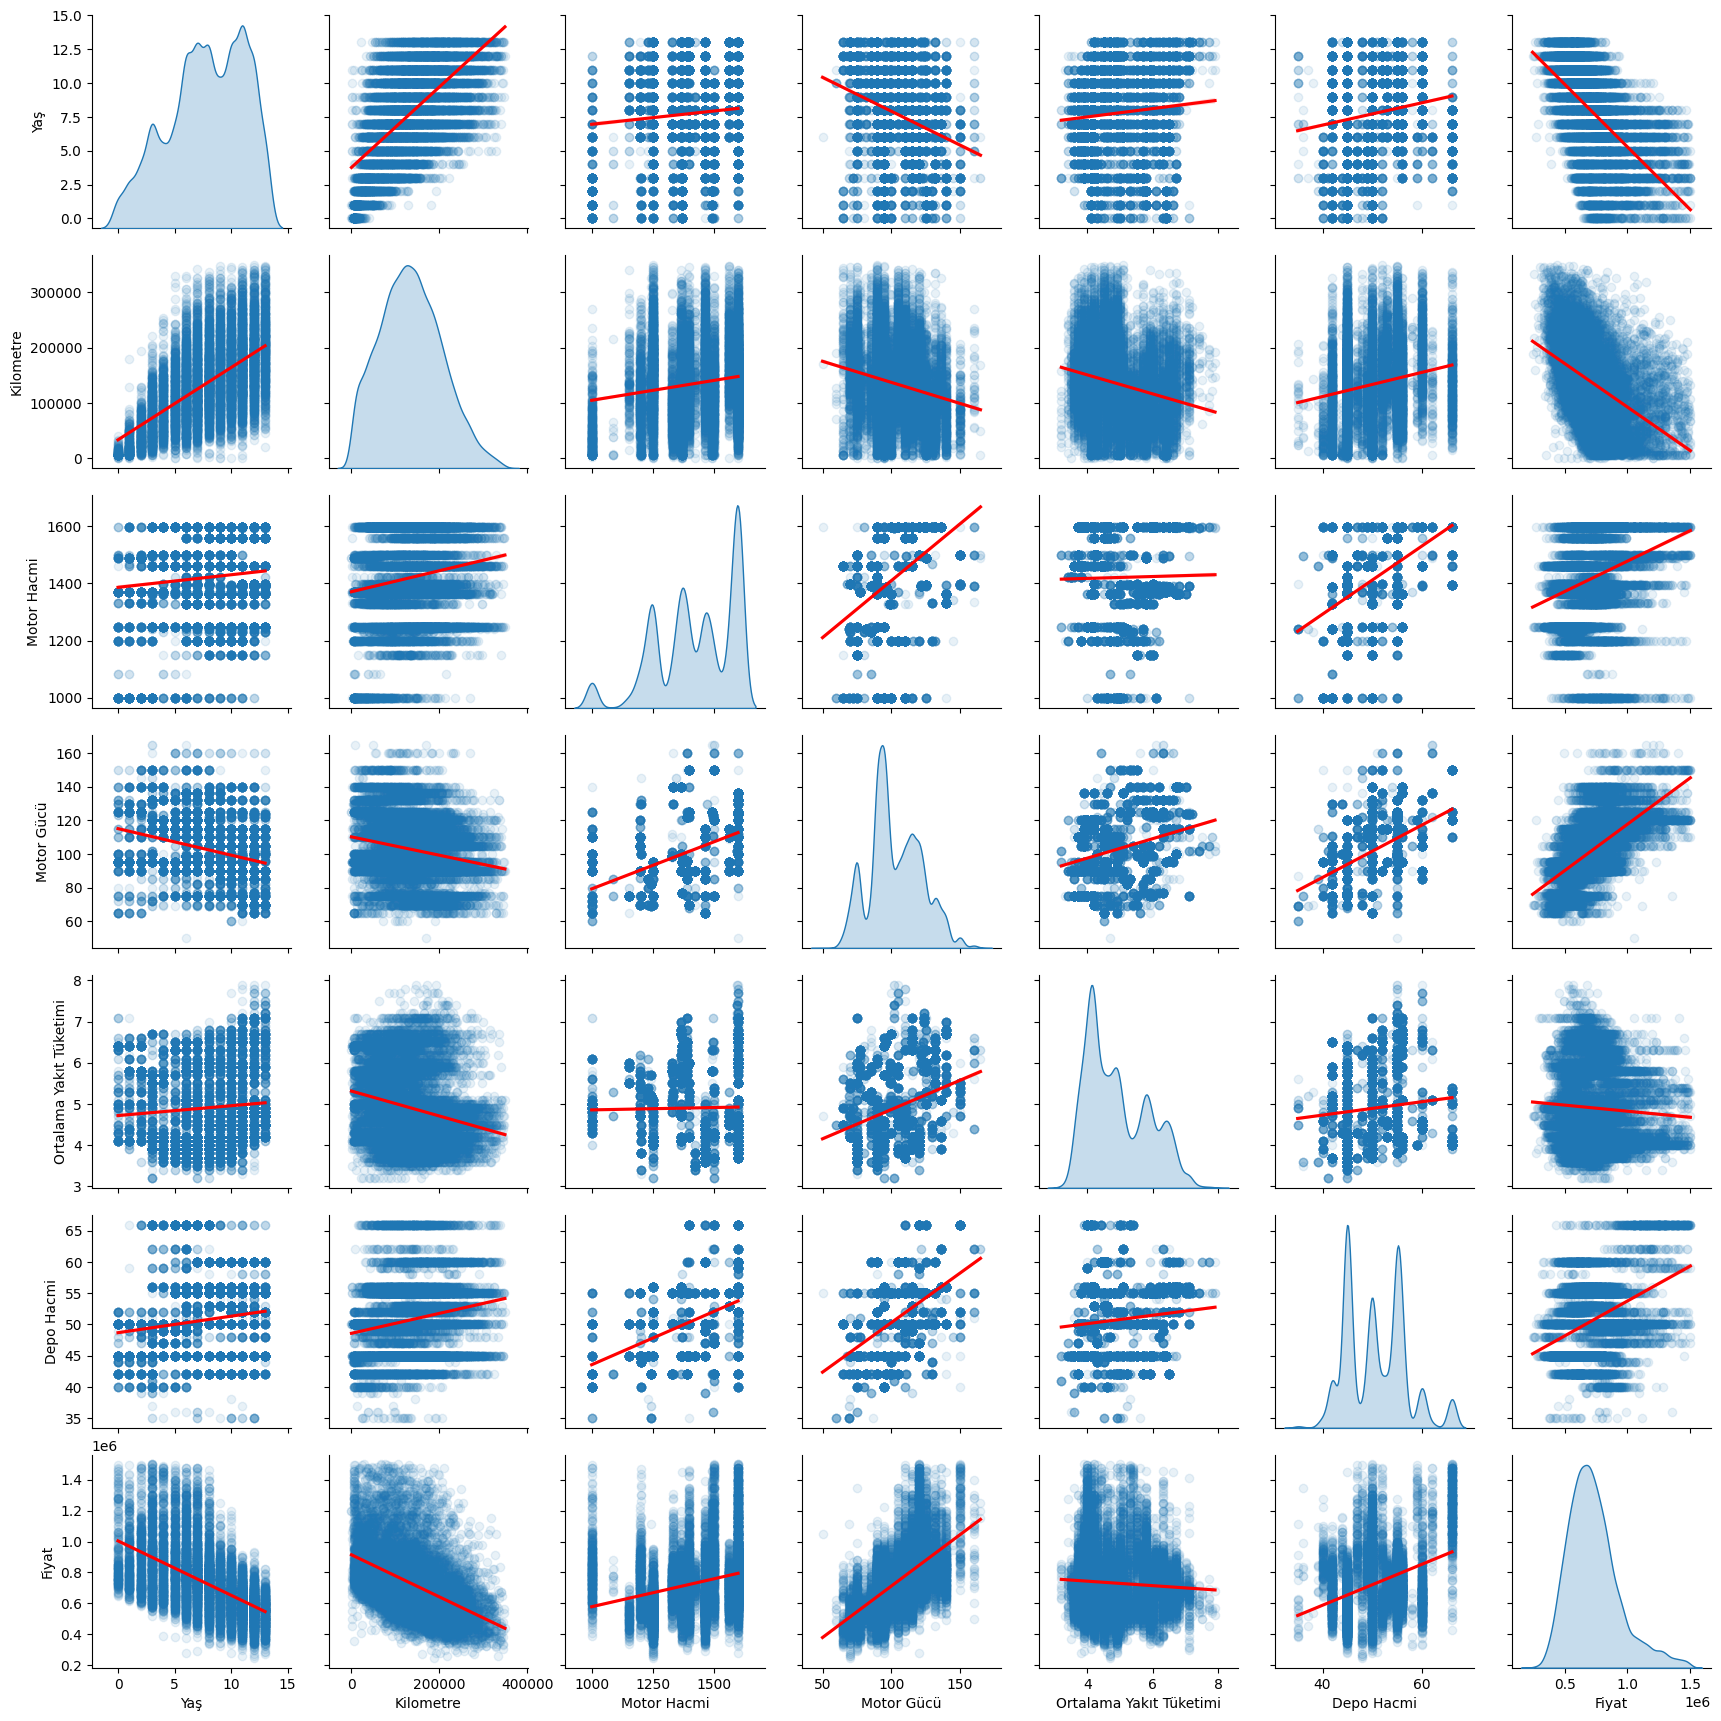

In [25]:
#Drawing Pairplot in reduced data from outliers
sns.pairplot(smaller_df2, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

In [26]:
smaller_df2.corr()['Fiyat'].sort_values(ascending=False)

Fiyat                      1.000000
Motor Gücü                 0.606063
Depo Hacmi                 0.386032
Motor Hacmi                0.277335
Ortalama Yakıt Tüketimi   -0.065648
Kilometre                 -0.463231
Yaş                       -0.571744
Name: Fiyat, dtype: float64

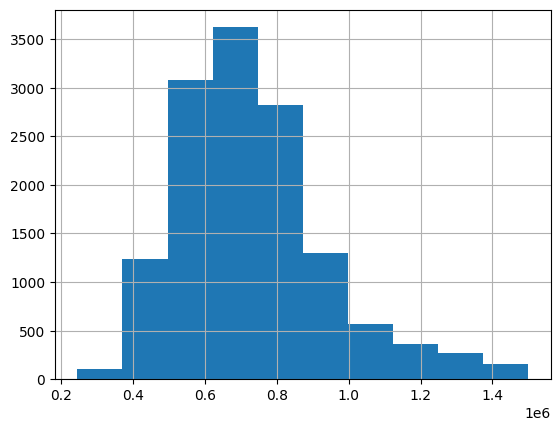

In [27]:
smaller_df2.Fiyat.hist();  # positive right skewed

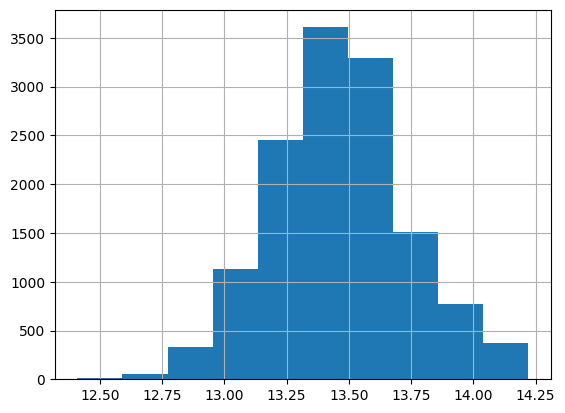

In [28]:
smaller_df2['log_Fiyat'] = np.log(smaller_df2.Fiyat)

smaller_df2.log_Fiyat.hist(); #the histogram looks better

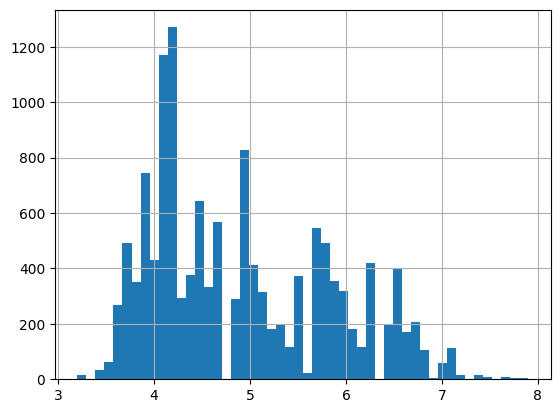

In [29]:
smaller_df2["Ortalama Yakıt Tüketimi"].hist( bins=50,);  # positive right skewed

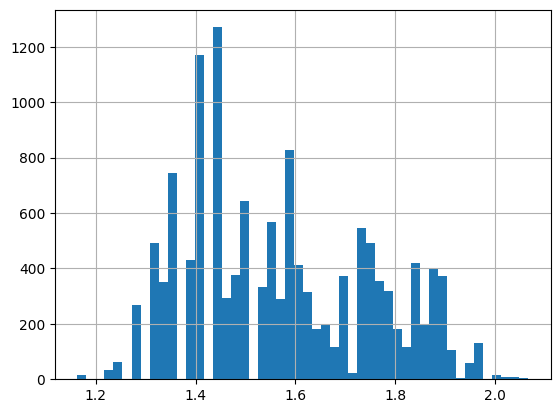

In [30]:
smaller_df2['log_Tuketim'] = np.log(smaller_df2["Ortalama Yakıt Tüketimi"])

smaller_df2.log_Tuketim.hist(bins=50); 

In [31]:
smaller_df2

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat,log_Fiyat,log_Tuketim
0,5,161000.0,1598,115,4.2,50.0,970000,13.785051,1.435085
1,5,82000.0,999,95,4.6,40.0,860000,13.664688,1.526056
4,7,73000.0,1422,90,3.4,45.0,770000,13.554146,1.223775
6,9,115000.0,1390,122,6.2,55.0,980000,13.795308,1.824549
7,9,93500.0,1390,85,5.9,45.0,665000,13.407542,1.774952
...,...,...,...,...,...,...,...,...,...
14598,13,159000.0,1248,70,4.6,51.0,403000,12.906692,1.526056
14599,4,68000.0,1368,95,5.7,45.0,600000,13.304685,1.740466
14600,7,161000.0,1248,95,4.9,45.0,515000,13.151922,1.589235
14601,10,194800.0,1368,77,5.7,45.0,510000,13.142166,1.740466


## 4. Fitting Model After Cleaned Outliers

In [32]:
lsm = smf.ols('log_Fiyat ~  Yaş + Kilometre + Q("Motor Hacmi") + Q("Motor Gücü") + Q("Ortalama Yakıt Tüketimi") + Q("Depo Hacmi")', data=smaller_df2)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Fiyat   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     5710.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:37:22   Log-Likelihood:                 6855.8
No. Observations:               13527   AIC:                        -1.370e+04
Df Residuals:                   13520   BIC:                        -1.365e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       12.7860      0.014    895.571      0.000      12.758      12.814
Yaş                             -0.0237      0.001    -44.155      0.000      -0.025      -0.023
Kilometre                    -1.451e-06   2.48e-08    -58.408      0.000    -1.5e-06    -1.4e-06
Q("Motor Hacmi")                 0.0001   9.65e-06     14.542      0.000       0.000       0.000
Q("Motor Gücü")                  0.0050   9.71e-05     51.410      0.000       0.005       0.005
Q("Ortalama Yakıt Tüketimi")    -0.0705      0.002    -45.588      0.000      -0.073      -0.067
Q("Depo Hacmi")                  0.0136      0.000     51.484      0.000       0.013       0.014
==============================================================================
Omnibus:                      197.427   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.051
Skew:                          -0.136   Prob(JB):                     1.42e-69
Kurtosis:                       3.699   Cond. No.                     1.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
smaller_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13527 entries, 0 to 14602
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Yaş                      13527 non-null  int64  
 1   Kilometre                13527 non-null  float64
 2   Motor Hacmi              13527 non-null  int64  
 3   Motor Gücü               13527 non-null  int64  
 4   Ortalama Yakıt Tüketimi  13527 non-null  float64
 5   Depo Hacmi               13527 non-null  float64
 6   Fiyat                    13527 non-null  int64  
 7   log_Fiyat                13527 non-null  float64
 8   log_Tuketim              13527 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.0 MB


## 5. Get Dummies & Label Encoding

In [34]:
df.Marka.value_counts()

Marka
Fiat          2263
Ford          2210
Renault       2202
Opel          2089
Toyota        1929
Volkswagen    1819
Skoda         1015
Name: count, dtype: int64

In [35]:
## Adding "Brand" Columns in model
brand = pd.get_dummies(df.Marka, drop_first=True)
brand

,Ford,Opel,Renault,Skoda,Toyota,Volkswagen
0,False,False,False,False,False,True
1,False,False,False,False,False,True
4,False,False,False,False,False,True
6,False,False,False,False,False,True
7,False,False,False,False,False,True
...,...,...,...,...,...,...
14598,False,False,False,False,False,False
14599,False,False,False,False,False,False
14600,False,False,False,False,False,False
14601,False,False,False,False,False,False


In [36]:
df2 = smaller_df2.join(brand)

In [37]:
lsm = smf.ols('log_Fiyat ~ Yaş + Kilometre + Q("Motor Hacmi") + Q("Motor Gücü") + Q("Ortalama Yakıt Tüketimi") + Q("Depo Hacmi")  + Ford + Opel + Renault + Skoda + Toyota + Volkswagen ', data=df2)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Fiyat   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     5374.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:37:33   Log-Likelihood:                 10174.
No. Observations:               13527   AIC:                        -2.032e+04
Df Residuals:                   13514   BIC:                        -2.022e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       12.9194      0.011   1129.418      0.000      12.897      12.942
Ford[T.True]                     0.1874      0.004     50.329      0.000       0.180       0.195
Opel[T.True]                     0.1201      0.004     31.576      0.000       0.113       0.128
Renault[T.True]                  0.0747      0.004     20.762      0.000       0.068       0.082
Skoda[T.True]                    0.2896      0.005     61.935      0.000       0.280       0.299
Toyota[T.True]                   0.2098      0.004     54.412      0.000       0.202       0.217
Volkswagen[T.True]               0.3017      0.004     76.695      0.000       0.294       0.309
Yaş                             -0.0321      0.000    -71.424      0.000      -0.033      -0.031
Kilometre                    -1.176e-06   1.99e-08    -59.179      0.000   -1.21e-06   -1.14e-06
Q("Motor Hacmi")              9.595e-05   7.84e-06     12.244      0.000    8.06e-05       0.000
Q("Motor Gücü")                  0.0042   7.84e-05     53.626      0.000       0.004       0.004
Q("Ortalama Yakıt Tüketimi")    -0.0484      0.001    -38.120      0.000      -0.051      -0.046
Q("Depo Hacmi")                  0.0092      0.000     41.445      0.000       0.009       0.010
==============================================================================
Omnibus:                      623.342   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2161.774
Skew:                          -0.072   Prob(JB):                         0.00
Kurtosis:                       4.953   Cond. No.                     1.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
vites = df["Vites Tipi"]
df3 = df2.join(vites)
df3.sample(10, random_state=42)

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat,log_Fiyat,log_Tuketim,Ford,Opel,Renault,Skoda,Toyota,Volkswagen,Vites Tipi
8990,7,90000.0,1598,115,6.5,56.0,675000,13.422468,1.871802,False,True,False,False,False,False,Düz
3601,10,152000.0,1364,90,4.1,55.0,660000,13.399995,1.410987,False,False,False,False,True,False,Düz
2939,7,113000.0,1364,90,4.1,55.0,850000,13.652992,1.410987,False,False,False,False,True,False,Düz
10839,12,170000.0,1560,110,4.8,55.0,625000,13.345507,1.568616,True,False,False,False,False,False,Düz
236,13,220000.0,1390,122,6.0,55.0,705000,13.465953,1.791759,False,False,False,False,False,True,Yarı Otomatik
8182,12,224000.0,1248,90,5.1,52.0,587000,13.282780,1.629241,False,True,False,False,False,False,Düz
1828,12,145000.0,1390,85,5.8,45.0,574000,13.260385,1.757858,False,False,False,False,False,True,Yarı Otomatik
480,6,140000.0,1197,105,4.9,55.0,950000,13.764217,1.589235,False,False,False,False,False,True,Yarı Otomatik
8565,10,115000.0,1598,115,6.3,52.0,550000,13.217674,1.840550,False,True,False,False,False,False,Yarı Otomatik
11454,13,230000.0,1399,68,4.5,45.0,465000,13.049793,1.504077,True,False,False,False,False,False,Düz


In [39]:
df3.replace({'Vites Tipi': { 'Düz' :1.0 , 'Yarı Otomatik':1.5 , 'Otomatik':2.0}}, inplace=True)
df3

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat,log_Fiyat,log_Tuketim,Ford,Opel,Renault,Skoda,Toyota,Volkswagen,Vites Tipi
0,5,161000.0,1598,115,4.2,50.0,970000,13.785051,1.435085,False,False,False,False,False,True,1.5
1,5,82000.0,999,95,4.6,40.0,860000,13.664688,1.526056,False,False,False,False,False,True,1.5
4,7,73000.0,1422,90,3.4,45.0,770000,13.554146,1.223775,False,False,False,False,False,True,1.0
6,9,115000.0,1390,122,6.2,55.0,980000,13.795308,1.824549,False,False,False,False,False,True,1.0
7,9,93500.0,1390,85,5.9,45.0,665000,13.407542,1.774952,False,False,False,False,False,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14598,13,159000.0,1248,70,4.6,51.0,403000,12.906692,1.526056,False,False,False,False,False,False,1.0
14599,4,68000.0,1368,95,5.7,45.0,600000,13.304685,1.740466,False,False,False,False,False,False,1.0
14600,7,161000.0,1248,95,4.9,45.0,515000,13.151922,1.589235,False,False,False,False,False,False,1.0
14601,10,194800.0,1368,77,5.7,45.0,510000,13.142166,1.740466,False,False,False,False,False,False,1.0


## 5. Correlation and Searching Multicorr

In [47]:
corr = df3.corr()
corr

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat,log_Fiyat,log_Tuketim,Ford,Opel,Renault,Skoda,Toyota,Volkswagen,Vites Tipi
Yaş,1.000000,0.622878,0.092750,-0.280624,0.085805,0.147774,-0.571744,-0.589093,0.087290,0.184557,0.126528,-0.090929,-0.066275,0.005959,0.033611,-0.256955
Kilometre,0.622878,1.000000,0.162012,-0.203544,-0.227883,0.186844,-0.463231,-0.500669,-0.228402,0.109290,-0.030870,0.037706,0.013749,-0.101415,0.048592,-0.221124
Motor Hacmi,0.092750,0.162012,1.000000,0.470696,0.019372,0.450801,0.277335,0.286212,-0.010552,0.203220,-0.023286,-0.088938,0.122261,0.038577,0.022564,0.159803
Motor Gücü,-0.280624,-0.203544,0.470696,1.000000,0.286507,0.496992,0.606063,0.619748,0.283090,-0.043965,0.141958,-0.165093,0.094399,0.100551,0.081607,0.441716
Ortalama Yakıt Tüketimi,0.085805,-0.227883,0.019372,0.286507,1.000000,0.104758,-0.065648,-0.049102,0.996233,-0.041648,0.232430,-0.168069,-0.152824,0.189788,-0.111676,0.117446
Depo Hacmi,0.147774,0.186844,0.450801,0.496992,0.104758,1.000000,0.386032,0.368834,0.104146,-0.067992,0.077076,-0.007701,0.152228,0.143862,0.144388,0.090771
Fiyat,-0.571744,-0.463231,0.277335,0.606063,-0.065648,0.386032,1.000000,0.981307,-0.066598,-0.071010,-0.089217,-0.125096,0.271348,0.117730,0.270313,0.467385
log_Fiyat,-0.589093,-0.500669,0.286212,0.619748,-0.049102,0.368834,0.981307,1.000000,-0.052628,-0.059408,-0.075595,-0.129102,0.253549,0.141104,0.257793,0.473057
log_Tuketim,0.087290,-0.228402,-0.010552,0.283090,0.996233,0.104146,-0.066598,-0.052628,1.000000,-0.040222,0.225251,-0.176543,-0.157215,0.195125,-0.107930,0.114099
Ford,0.184557,0.109290,0.203220,-0.043965,-0.041648,-0.067992,-0.071010,-0.059408,-0.040222,1.000000,-0.188853,-0.194859,-0.125864,-0.180221,-0.174183,-0.078630


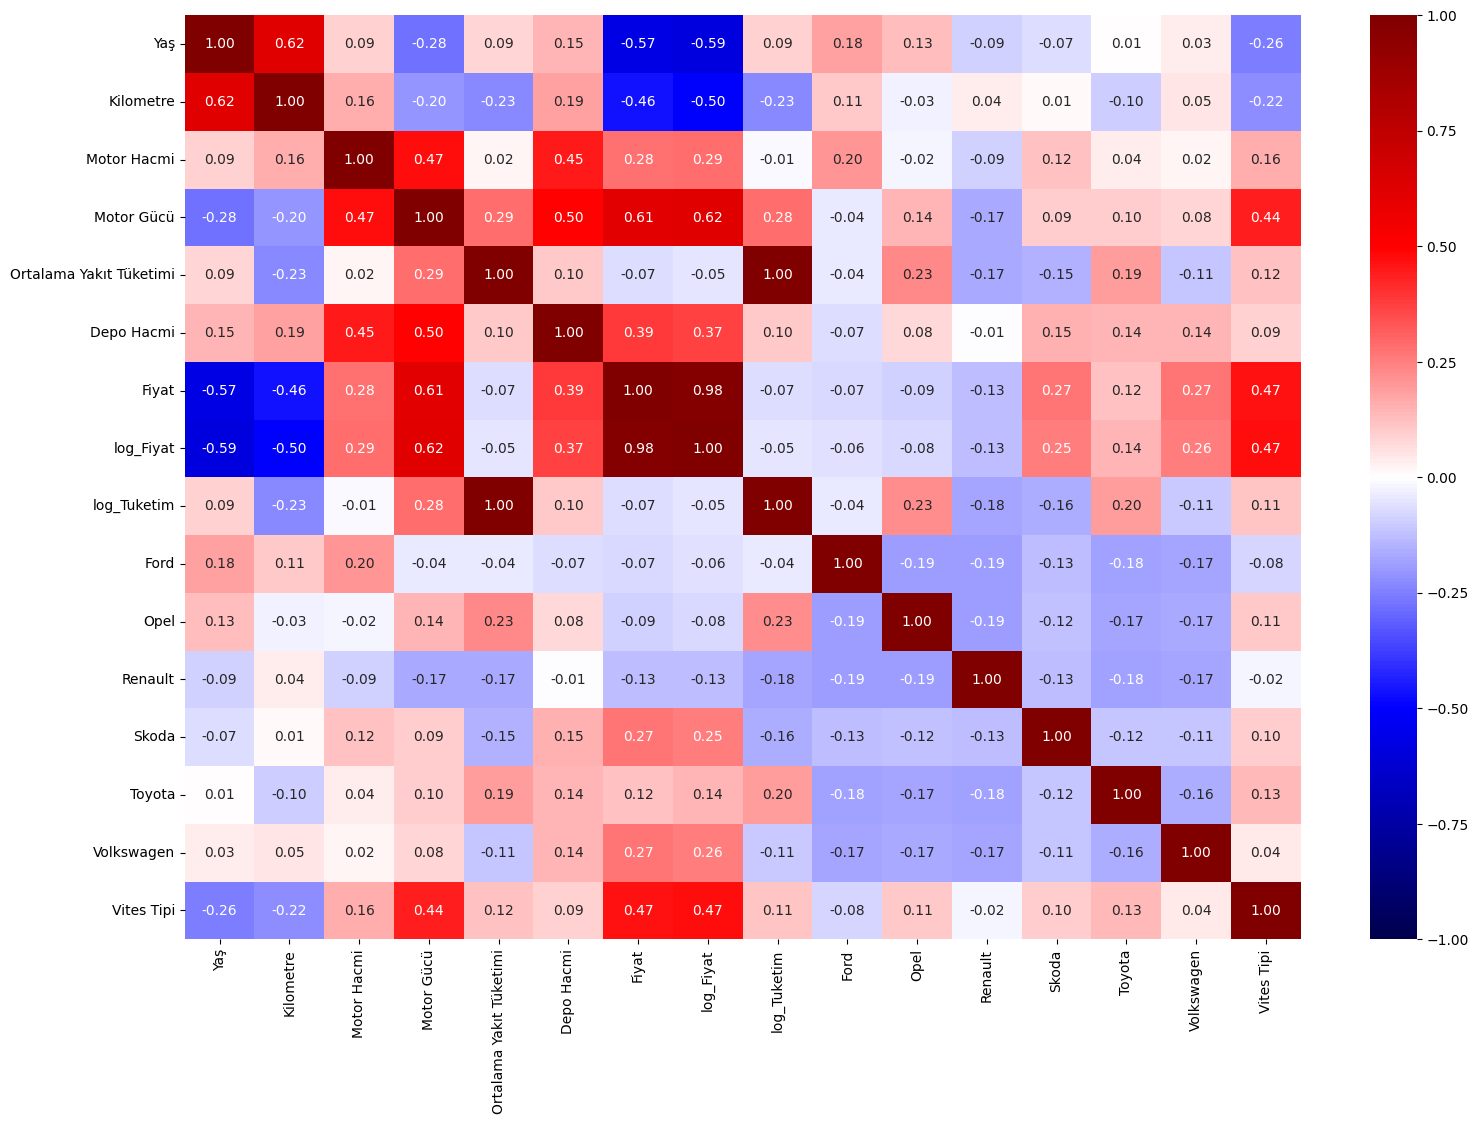

In [48]:
plt.figure(figsize=[18,12])
sns.heatmap(df3.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.2f');

In [49]:
correlation_matrix = df3.corr()
correlation_list = correlation_matrix['log_Fiyat'].sort_values(ascending=False)
correlation_list

log_Fiyat                  1.000000
Fiyat                      0.981307
Motor Gücü                 0.619748
Vites Tipi                 0.473057
Depo Hacmi                 0.368834
Motor Hacmi                0.286212
Volkswagen                 0.257793
Skoda                      0.253549
Toyota                     0.141104
Ortalama Yakıt Tüketimi   -0.049102
log_Tuketim               -0.052628
Ford                      -0.059408
Opel                      -0.075595
Renault                   -0.129102
Kilometre                 -0.500669
Yaş                       -0.589093
Name: log_Fiyat, dtype: float64

## 6. Feature Engineering

In [50]:
df["Depo_Hacmi_Kullanabilirliği"] = df["Depo Hacmi"] / df["Ortalama Yakıt Tüketimi"]
df["Ters_Motor_Gücü"] = 1 / df["Motor Gücü"]
df["Yakıt_Ekonomisi"] = df["Ters_Motor_Gücü"] * df["Ortalama Yakıt Tüketimi"]
df["Engine_Ratio"] = df["Motor Hacmi"] / df["Motor Gücü"]

In [52]:
x = df["Depo_Hacmi_Kullanabilirliği"]
y = df['Ters_Motor_Gücü']
z = df['Yakıt_Ekonomisi']
a = df['Engine_Ratio']
df5 = pd.concat([df3, x, y, z, a], axis=1)
df5.sample(10, random_state=42)

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat,log_Fiyat,log_Tuketim,Ford,Opel,Renault,Skoda,Toyota,Volkswagen,Vites Tipi,Depo_Hacmi_Kullanabilirliği,Ters_Motor_Gücü,Yakıt_Ekonomisi,Engine_Ratio
8990,7,90000.0,1598,115,6.5,56.0,675000,13.422468,1.871802,False,True,False,False,False,False,1.0,8.615385,0.008696,0.056522,13.895652
3601,10,152000.0,1364,90,4.1,55.0,660000,13.399995,1.410987,False,False,False,False,True,False,1.0,13.414634,0.011111,0.045556,15.155556
2939,7,113000.0,1364,90,4.1,55.0,850000,13.652992,1.410987,False,False,False,False,True,False,1.0,13.414634,0.011111,0.045556,15.155556
10839,12,170000.0,1560,110,4.8,55.0,625000,13.345507,1.568616,True,False,False,False,False,False,1.0,11.458333,0.009091,0.043636,14.181818
236,13,220000.0,1390,122,6.0,55.0,705000,13.465953,1.791759,False,False,False,False,False,True,1.5,9.166667,0.008197,0.049180,11.393443
8182,12,224000.0,1248,90,5.1,52.0,587000,13.282780,1.629241,False,True,False,False,False,False,1.0,10.196078,0.011111,0.056667,13.866667
1828,12,145000.0,1390,85,5.8,45.0,574000,13.260385,1.757858,False,False,False,False,False,True,1.5,7.758621,0.011765,0.068235,16.352941
480,6,140000.0,1197,105,4.9,55.0,950000,13.764217,1.589235,False,False,False,False,False,True,1.5,11.224490,0.009524,0.046667,11.400000
8565,10,115000.0,1598,115,6.3,52.0,550000,13.217674,1.840550,False,True,False,False,False,False,1.5,8.253968,0.008696,0.054783,13.895652
11454,13,230000.0,1399,68,4.5,45.0,465000,13.049793,1.504077,True,False,False,False,False,False,1.0,10.000000,0.014706,0.066176,20.573529


In [53]:
df5.to_csv("Feature_Engineering_Data.csv")

In [55]:
lsm = smf.ols('log_Fiyat ~ Yaş + Kilometre + Q("Motor Hacmi") + Q("Motor Gücü") + Q("Ortalama Yakıt Tüketimi") + Q("Depo Hacmi")  + Ford + Opel + Renault + Skoda + Toyota + Volkswagen + Q("Vites Tipi") + Depo_Hacmi_Kullanabilirliği + Ters_Motor_Gücü + Yakıt_Ekonomisi + Engine_Ratio', data=df5)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Fiyat   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     4272.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:40:38   Log-Likelihood:                 10847.
No. Observations:               13527   AIC:                        -2.166e+04
Df Residuals:                   13509   BIC:                        -2.152e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       12.9102      0.075    171.667      0.000      12.763      13.058
Ford[T.True]                     0.1802      0.004     49.019      0.000       0.173       0.187
Opel[T.True]                     0.1011      0.004     25.904      0.000       0.093       0.109
Renault[T.True]                  0.0552      0.004     15.189      0.000       0.048       0.062
Skoda[T.True]                    0.2542      0.005     55.227      0.000       0.245       0.263
Toyota[T.True]                   0.1933      0.004     47.935      0.000       0.185       0.201
Volkswagen[T.True]               0.2790      0.004     71.834      0.000       0.271       0.287
Yaş                             -0.0297      0.000    -68.453      0.000      -0.031      -0.029
Kilometre                    -1.165e-06   1.89e-08    -61.515      0.000    -1.2e-06   -1.13e-06
Q("Motor Hacmi")              3.311e-05   3.92e-05      0.844      0.399   -4.38e-05       0.000
Q("Motor Gücü")                  0.0031      0.000     11.101      0.000       0.003       0.004
Q("Ortalama Yakıt Tüketimi")    -0.0283      0.010     -2.943      0.003      -0.047      -0.009
Q("Depo Hacmi")                  0.0012      0.001      1.590      0.112      -0.000       0.003
Q("Vites Tipi")                  0.0972      0.003     30.298      0.000       0.091       0.103
Depo_Hacmi_Kullanabilirliği      0.0425      0.003     12.184      0.000       0.036       0.049
Ters_Motor_Gücü                -41.1993      6.281     -6.559      0.000     -53.511     -28.887
Yakıt_Ekonomisi                  6.5206      0.676      9.642      0.000       5.195       7.846
Engine_Ratio                     0.0023      0.004      0.607      0.544      -0.005       0.010
==============================================================================
Omnibus:                      814.998   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3184.673
Skew:                          -0.172   Prob(JB):                         0.00
Kurtosis:                       5.352   Cond. No.                     1.03e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 7. Test Validation

In [56]:
df5.columns

Index(['Yaş', 'Kilometre', 'Motor Hacmi', 'Motor Gücü',
       'Ortalama Yakıt Tüketimi', 'Depo Hacmi', 'Fiyat', 'log_Fiyat',
       'log_Tuketim', 'Ford', 'Opel', 'Renault', 'Skoda', 'Toyota',
       'Volkswagen', 'Vites Tipi', 'Depo_Hacmi_Kullanabilirliği',
       'Ters_Motor_Gücü', 'Yakıt_Ekonomisi', 'Engine_Ratio'],
      dtype='object')

In [57]:
#Preparing for model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X = df5.drop(columns=['Fiyat', 'log_Fiyat'])
y = df5['log_Fiyat']

X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("x_test:", x_test.shape)
print("y_test", y_test.shape)

X_train: (10821, 18)
Y_train: (10821,)
x_test: (2706, 18)
y_test (2706,)


In [58]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (8115, 18)
y_train: (8115,)
x_val: (2706, 18)
y_val: (2706,)


In [59]:
scores = []
poly_degrees = 5

for degree in range(1, poly_degrees+1):
    
    poly = PolynomialFeatures(degree=degree)
    
   
    x_train_poly = poly.fit_transform(x_train.values)
    x_val_poly = poly.transform(x_val.values)
    
    lm_poly = LinearRegression()

    lm_poly.fit(x_train_poly, y_train)

    scores.append(lm_poly.score(x_val_poly, y_val))

#Results   
for degree, score in enumerate(scores):
    print(f"Polynomial Degree: {degree+1}, Validation Score: {score:.3f}")


Polynomial Degree: 1, Validation Score: 0.853
Polynomial Degree: 2, Validation Score: 0.875
Polynomial Degree: 3, Validation Score: 0.874
Polynomial Degree: 4, Validation Score: 0.873
Polynomial Degree: 5, Validation Score: 0.854


In [60]:
# Creating the 3 models we will use for the validation phase (model selection)

# Lineer Regression
lm = LinearRegression()

# Ridge Regression
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.values)
x_val_scaled = scaler.transform(x_val.values)
x_test_scaled = scaler.transform(x_test.values)

lm_reg = Ridge(alpha=22.21946860939524)

# Polynomial Regression
poly = PolynomialFeatures(degree=2) 

x_train_poly = poly.fit_transform(x_train.values)
x_val_poly = poly.transform(x_val.values)
x_test_poly = poly.transform(x_test.values)

lm_poly = LinearRegression()

In [61]:
# Results for valudation set

lm.fit(x_train, y_train)
print(f'Linear Regression R2: {lm.score(x_val, y_val):.3f}')

lm_reg.fit(x_train_scaled, y_train)
print(f'Ridge Regression R2: {lm_reg.score(x_val_scaled, y_val):.3f}')

lm_poly.fit(x_train_poly, y_train)
print(f'Degree 2 Polynomial Regression R2: {lm_poly.score(x_val_poly, y_val):.3f}')

Linear Regression R2: 0.853
Ridge Regression R2: 0.853
Degree 2 Polynomial Regression R2: 0.875


In [62]:
#Our Model Result
X_scaled = scaler.fit_transform(X_train.values)
lm_reg.fit(X_scaled, Y_train)
print(f'Ridge Regression Test R2: {lm_reg.score(x_test_scaled, y_test):.3f}')

Ridge Regression Test R2: 0.846


## 8. Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

lr_cv = cross_val_score(lr, X_train, Y_train, cv=10, scoring='r2')
lr_cv

array([0.84026802, 0.8374398 , 0.82043478, 0.83565187, 0.85050397,
       0.83552587, 0.84962955, 0.84772179, 0.8573288 , 0.84017313])

In [66]:
ridge = Ridge()
X_train_scaled = scaler.fit_transform(X_train.values)

ridge_cv = cross_val_score(ridge, X_train_scaled, Y_train, cv=10, scoring='r2')
ridge_cv

array([0.84025978, 0.83743344, 0.82044232, 0.83569999, 0.85052075,
       0.83549523, 0.84964387, 0.84767719, 0.85737002, 0.84018143])

In [77]:

# Create the polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create the linear regression model
lm_poly = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(lm_poly, X_poly, y, cv=10, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Scores:", cv_scores.std())

Cross-Validation Scores: [0.83398069 0.81573654 0.80308392 0.84901456 0.7848559  0.79436187
 0.79316384 0.8035559  0.80636041 0.79265278]
Mean Cross-Validation Score: 0.807676639597755
Standard Deviation of Cross-Validation Scores: 0.019078528736352615


In [76]:
#Cross Validation for Ridge Regression

# Create the Ridge Regression model

ridge = Ridge()

# Perform cross-validation

ridge_cv = cross_val_score(ridge, X_train_scaled, Y_train, cv=10, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation Scores:", ridge_cv)
print("Mean Cross-Validation Score:", ridge_cv.mean())
print("Standard Deviation of Cross-Validation Scores:", ridge_cv.std())

Cross-Validation Scores: [0.84025978 0.83743344 0.82044232 0.83569999 0.85052075 0.83549523
 0.84964387 0.84767719 0.85737002 0.84018143]
Mean Cross-Validation Score: 0.8414724031386249
Standard Deviation of Cross-Validation Scores: 0.009852110362715244


In [75]:
results = pd.DataFrame({
    'Model': ['Lineer Regression', 'Ridge Regression', 'Degree 2 Polynomial Regression'],
    'Cross Validated Score (Mean)': [lr_cv.mean(), ridge_cv.mean(), cv_scores.mean()],
    'Cross Validated Score (Std)': [lr_cv.std(), ridge_cv.std(), cv_scores.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Ridge Regression,0.841472,0.009852
Lineer Regression,0.841468,0.009848
Degree 2 Polynomial Regression,0.807677,0.019079


In [78]:
#Preparing for model

X = df5.drop(columns=['Fiyat', 'log_Fiyat'])
y = df5['log_Fiyat']

X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("x_test:", x_test.shape)
print("y_test", y_test.shape)

X_train: (10821, 18)
Y_train: (10821,)
x_test: (2706, 18)
y_test (2706,)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

In [80]:
# Ridge Regression
rm= Ridge()

In [82]:
# Results for valudation set

rm.fit(x_train, y_train)
print(f'Ridge Regression R2: {rm.score(x_val, y_val):.3f}')

Ridge Regression R2: 0.853


In [83]:
X = df5.drop(columns=['Fiyat', 'log_Fiyat'])
y = df5['log_Fiyat']


X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [84]:
rm = Ridge()

rm.fit(x_train,y_train)

pred = rm.predict(x_train)

# R2 Skor
print("R2 Score:", r2_score(y_train, pred))

R2 Score: 0.8378662958675295


In [85]:
rm = Ridge()

rm.fit(x_train,y_train)

pred = rm.predict(x_cv)

# R2 Skor
print("R2 Score:", r2_score(y_cv, pred))

R2 Score: 0.8525531470664267


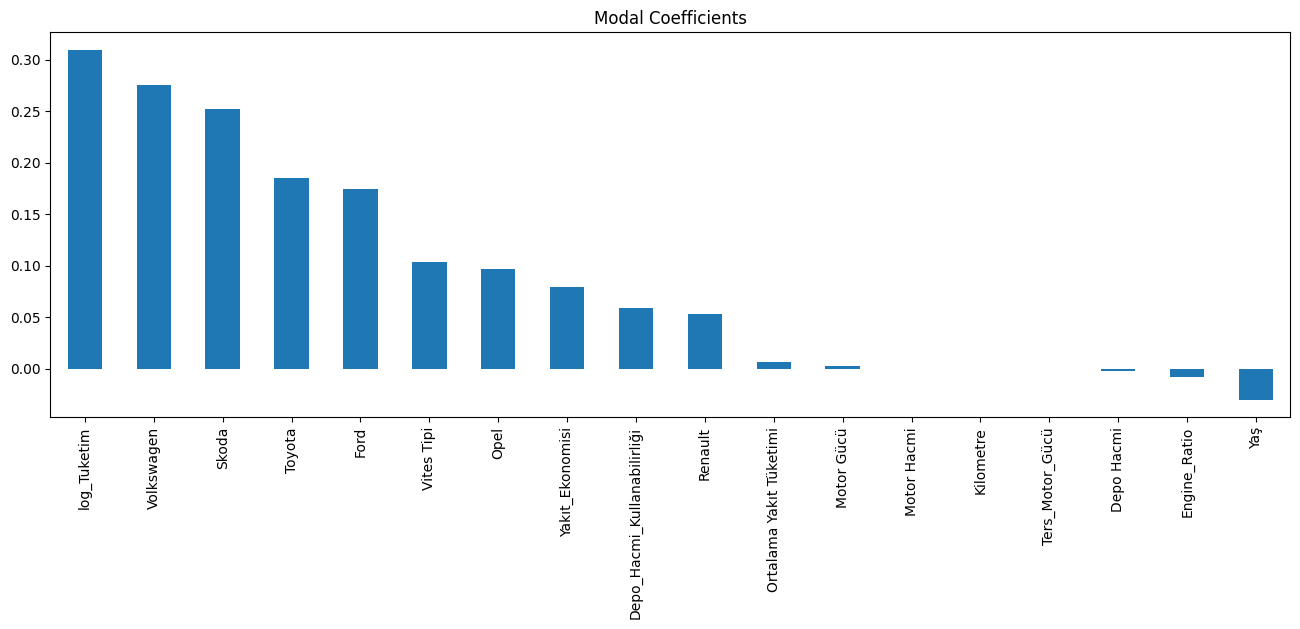

In [87]:
predictors = x_train.columns
coef = pd.Series(rm.coef_,predictors).sort_values(ascending=False)
plt.figure(figsize=[16,5])
coef.plot(kind='bar', title='Modal Coefficients');

In [88]:
from sklearn.preprocessing import MinMaxScaler

rm = Ridge()

minmax_scale = MinMaxScaler()
x_train_mms = minmax_scale.fit_transform(x_train.values)
x_cv_mms = minmax_scale.transform(x_cv.values)

rm.fit(x_train_mms,y_train)

pred = rm.predict(x_cv_mms)

# R2 Skor
print("R2 Score:", r2_score(y_cv, pred))

R2 Score: 0.853073580832173


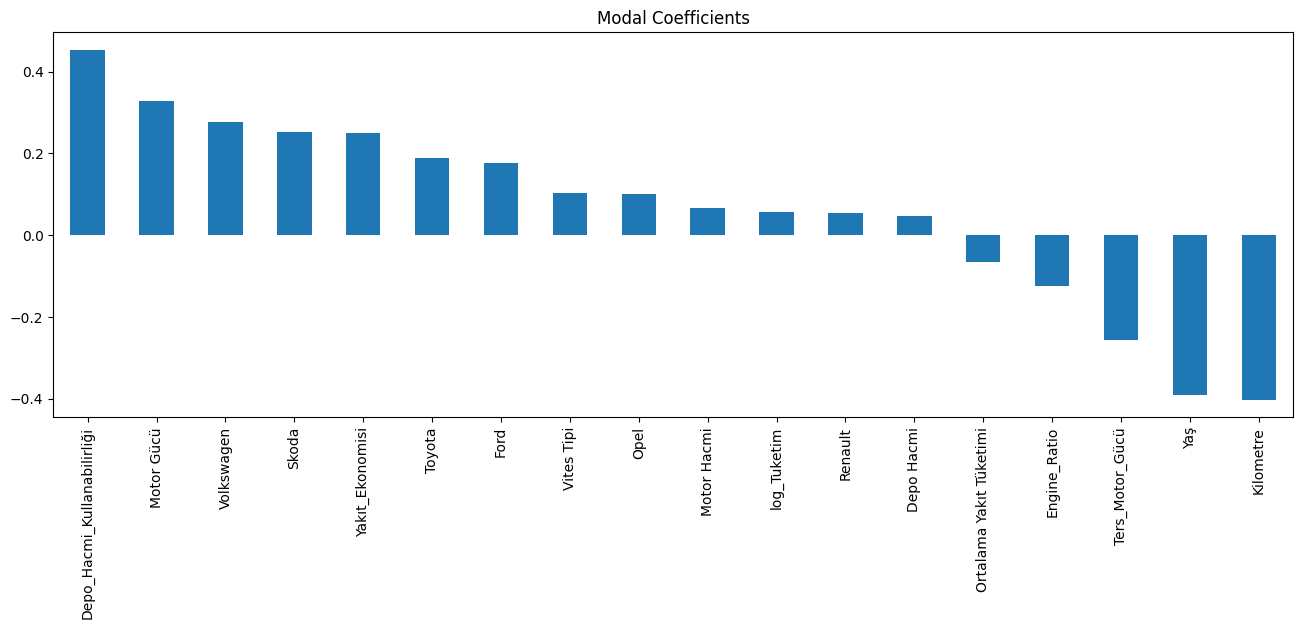

In [89]:
predictors = x_train.columns
coef = pd.Series(rm.coef_,predictors).sort_values(ascending=False)
plt.figure(figsize=[16,5])
coef.plot(kind='bar', title='Modal Coefficients');

In [90]:
real_pred = np.exp(pred)
real_y_cv = np.exp(y_cv.values)

print(f'Actual: {real_y_cv[:5].round(3)},\nPredicted: {real_pred[:5].round(3)}')

Actual: [600000. 490000. 755000. 667000. 810000.],
Predicted: [519690.263 490174.597 748833.706 555736.624 851441.509]


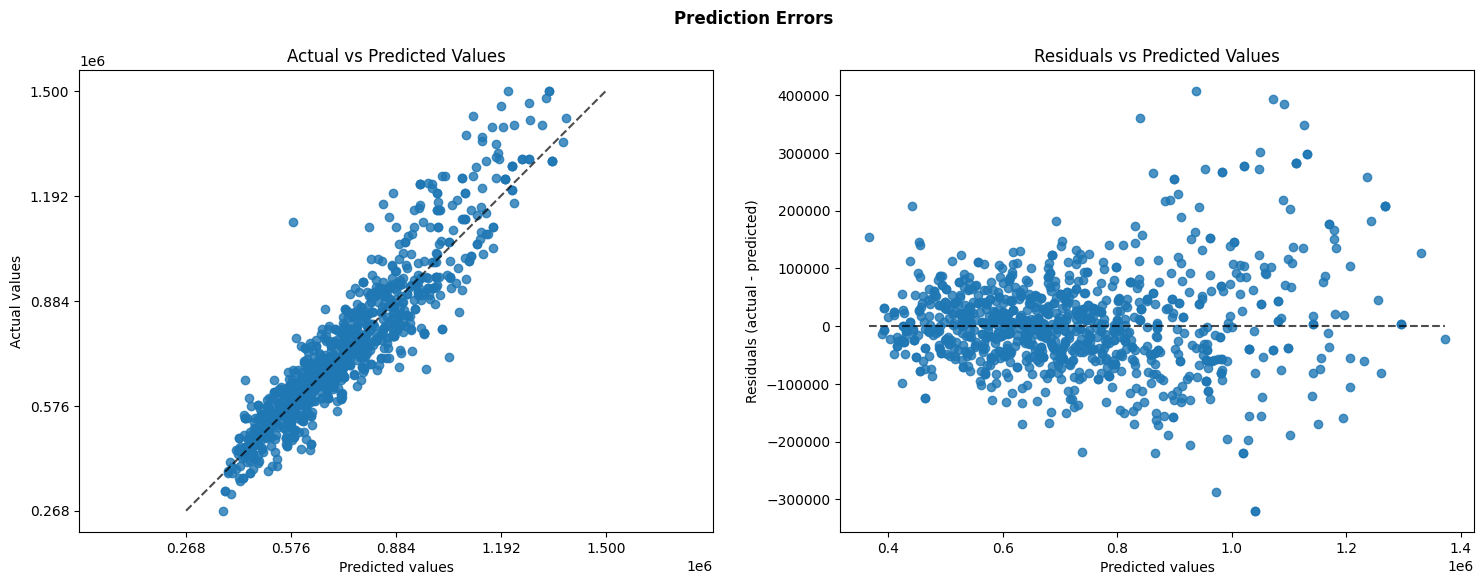

In [91]:
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(1, 2, figsize=[18,6])
fig.suptitle("Prediction Errors", weight="bold")

PredictionErrorDisplay.from_predictions(real_y_cv, real_pred, kind="actual_vs_predicted", ax=axs[0])
axs[0].set_title("Actual vs Predicted Values")

PredictionErrorDisplay.from_predictions(real_y_cv, real_pred, kind="residual_vs_predicted", ax=axs[1])
axs[1].set_title("Residuals vs Predicted Values");

In [92]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=1)

ridgeReg.fit(x_train_mms,y_train)

pred = ridgeReg.predict(x_cv_mms)

print("Validation Score:", r2_score(y_cv, pred))

Validation Score: 0.853073580832173


In [93]:
alphalist = 10**(np.linspace(0,2,200)) # Daha geniş aralıkta inceleme yapmak için np.linspace() parametrelerini değiştirin
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for index, curr_alpha in enumerate(alphalist):

    ridge = Ridge(alpha = curr_alpha)
    ridge.fit(x_train_mms, y_train)

    val_set_pred = ridge.predict(x_cv_mms)
    err_vec_val[index] = r2_score(y_cv, val_set_pred)

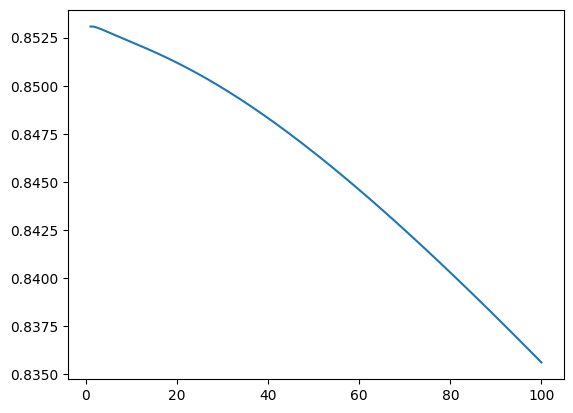

In [94]:
plt.plot(alphalist, err_vec_val);

In [95]:
np.max(err_vec_val)

0.8530776250570424

In [96]:
alphalist[np.argmax(err_vec_val)]

1.2315506032928256

In [97]:
ridgeReg2 = Ridge(alpha=1)

ridgeReg2.fit(x_train_mms,y_train)

pred = ridgeReg2.predict(x_cv_mms)

print("Validation Score:", r2_score(y_cv, pred))

Validation Score: 0.853073580832173


In [98]:

X_train_mms = minmax_scale.fit_transform(X_train.values)
x_test_mms = minmax_scale.transform(x_test.values)

ridgeReg2.fit(X_train_mms,Y_train) # !!!

pred = ridgeReg2.predict(x_test_mms)

print("Test Score:", r2_score(y_test, pred))

Test Score: 0.8462992395752558


In [99]:
test_mms = minmax_scale.transform(X_train.values)
ridgeReg2.predict(X_train_mms)

array([13.55370788, 13.25780155, 13.7196526 , ..., 13.43892501,
       13.59540277, 12.96120974])

In [100]:
np.exp(ridgeReg2.predict(test_mms))

array([769662.88033868, 572519.19839015, 908593.06573183, ...,
       686200.40887068, 802432.29979168, 425580.64508511])

In [101]:
X_train['Prediction'] = np.exp(ridgeReg2.predict(test_mms))
X_train

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,log_Tuketim,Ford,Opel,Renault,Skoda,Toyota,Volkswagen,Vites Tipi,Depo_Hacmi_Kullanabilirliği,Ters_Motor_Gücü,Yakıt_Ekonomisi,Engine_Ratio,Prediction
4400,9,212000.0,1598,105,3.9,50.0,1.360977,False,False,False,True,False,False,1.5,12.820513,0.009524,0.037143,15.219048,7.696629e+05
13388,3,25000.0,1242,69,5.6,35.0,1.722767,False,False,False,False,False,False,1.0,6.250000,0.014493,0.081159,18.000000,5.725192e+05
3283,5,42553.0,1496,111,4.8,42.0,1.568616,False,False,False,False,True,False,2.0,8.750000,0.009009,0.043243,13.477477,9.085931e+05
1286,7,91000.0,1395,150,4.7,50.0,1.547563,False,False,False,False,False,True,1.5,10.638298,0.006667,0.031333,9.300000,1.039470e+06
14471,4,175500.0,1248,95,4.1,45.0,1.410987,False,False,False,False,False,False,1.0,10.975610,0.010526,0.043158,13.136842,6.011452e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,2,44000.0,999,65,4.9,42.0,1.589235,False,False,True,False,False,False,1.0,8.571429,0.015385,0.075385,15.369231,6.395842e+05
14492,11,134500.0,1598,105,5.1,45.0,1.629241,False,False,False,False,False,False,1.0,8.823529,0.009524,0.048571,15.219048,5.116676e+05
6063,6,85000.0,1598,115,6.3,49.0,1.840550,False,False,True,False,False,False,1.0,7.777778,0.008696,0.054783,13.895652,6.862004e+05
1060,12,109000.0,1598,105,4.7,55.0,1.547563,False,False,False,False,False,True,1.5,11.702128,0.009524,0.044762,15.219048,8.024323e+05
